# **Fashion MNIST Classification - Convolutional Neural Networks (CNNs)**

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

sns.set()
warnings.filterwarnings('ignore')

In [2]:
#Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Shuffle the indices
indices = np.arange(len(X_train))
np.random.shuffle(indices)  

# Apply the shuffle to the data
X_train = X_train[indices]
y_train = y_train[indices]

X_train = X_train / 255.0  
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28 * 28)  
X_test = X_test.reshape(-1, 28 * 28)

# Here, we are reshaping our our original X_train or size (60000, 28*28), to (60000,28,28,1). 
# Why? 
# Convolutional layers in CNNs expect input in a specific shape: (batch_size, height, width, channels). 
# The "channels" dimension indicates the color channels in an image (e.g., 1 for grayscale, 3 for RGB).
# Fashion MNIST contains 28x28 grayscale images of shape (60000, 28, 28), lacking the "channels" dimension. 
# Reshaping to (60000, 28, 28, 1) explicitly adds the channel dimension, indicating these are grayscale images.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [3]:
X_train.shape

(60000, 28, 28, 1)

In [4]:
y_train.shape

(60000,)

# Creating a CNN

In [5]:
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)),  # First convolutional layer
        layers.MaxPooling2D((2, 2)),  # First max-pooling layer
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),  # Second convolutional layer
        layers.MaxPooling2D((2, 2)),  # Second max-pooling layer
        layers.Flatten(),  # Flatten the 3D output to 1D
        layers.Dense(128, activation='relu'),  # Dense layer for further processing
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes (softmax activation)
    ])
    return model

# CASE 1: Vanilla Training

In [41]:
model1 = create_model()
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model1.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

In [43]:
history1 = model1.fit(X_train, 
                      y_train, 
                      epochs=100, 
                      validation_split=0.2, 
                      batch_size=1024,
                      validation_batch_size=1024,
                      verbose=1)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.6083 - loss: 1.2591 - val_accuracy: 0.8220 - val_loss: 0.5060
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8311 - loss: 0.4778 - val_accuracy: 0.8417 - val_loss: 0.4304
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.8598 - loss: 0.4033 - val_accuracy: 0.8608 - val_loss: 0.3869
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.8658 - loss: 0.3773 - val_accuracy: 0.8748 - val_loss: 0.3586
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.8809 - loss: 0.3403 - val_accuracy: 0.8831 - val_loss: 0.3332
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.8872 - loss: 0.3177 - val_accuracy: 0.8863 - val_loss: 0.3170
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.8936 - loss: 0.3031 - val_accuracy: 0.8867 - val_loss: 0.3165
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.8974 - loss: 0.2898 - val_accu

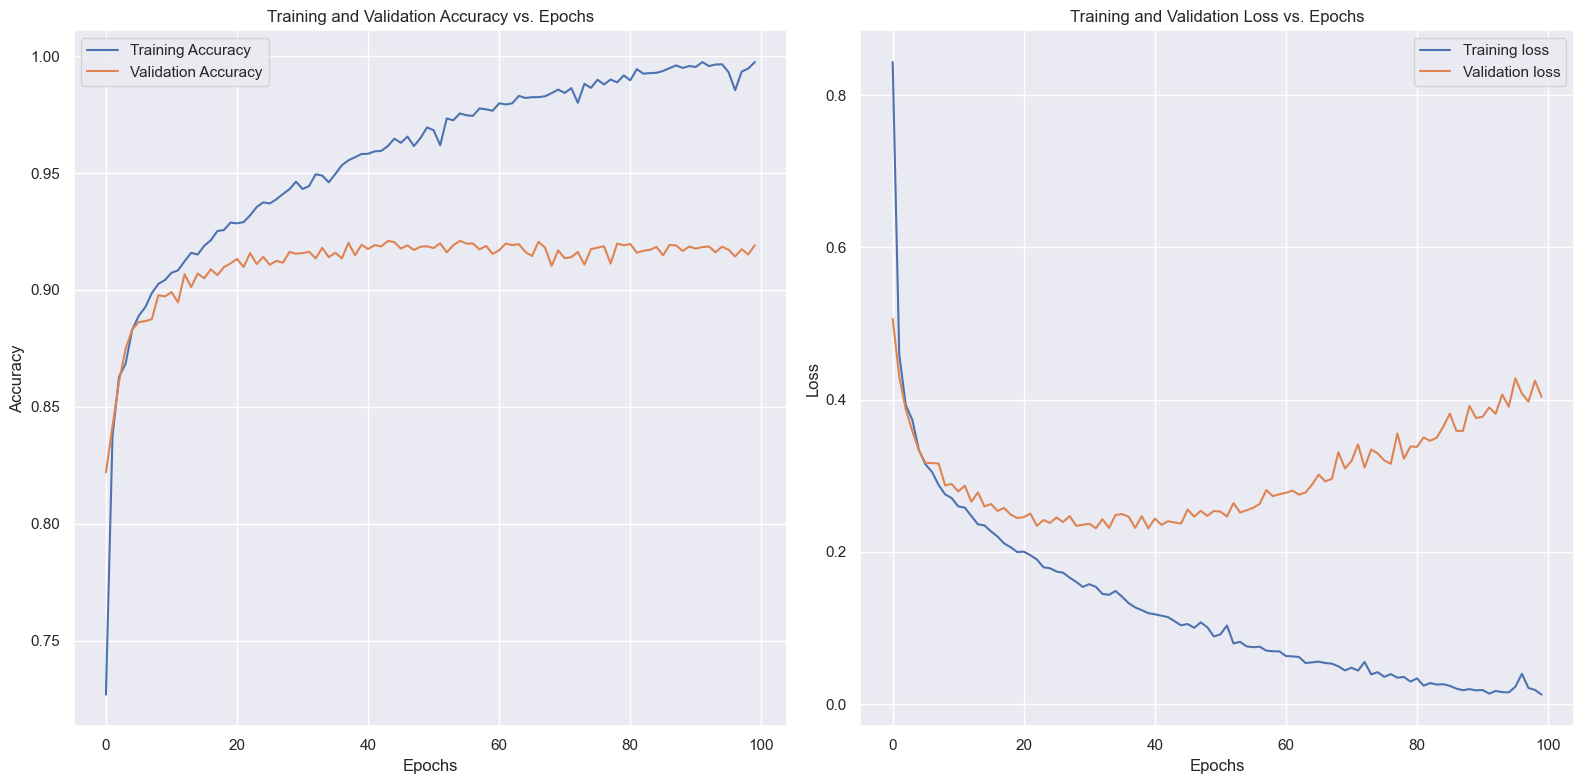

In [44]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

**Observations**:
1. We can see that for 100 epochs, our CNN undergoes **severe overfitting**. This is characterized by **Very high training accuracy (close to 1) and low validation accuracy**.
2. The loss curve shows interesting characteristics. Initially, training loss is very high compared to validation loss, since the CNN has not learnt anything yet (**underfitting**), and the number of datapoints in training set are much greater than those in validation set.
3. The initial stage of the training is characterised by a **high bias and low variance**. 
4. As the CNN is trained, the model complexity keeps on increasing and thus, the **training loss keeps decreasing**, while the **validation loss reaches a minimum value, after which it starts increasing again**.
5. At the end of training, the the model has almost perfectly learnt the patterns in the training data. Hence, the training loss is much lower. But at the same time, it fails at generalization and thus fails to detect meaningful patterns on unseen data. (**Overfitting**).
6. This end stage of the training is characterized by **low bias and high variance**. 

In [ ]:
train_loss1, train_accuracy1 = model1.evaluate(X_train, y_train, verbose=0)
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test, verbose=0)

In [75]:
print("CASE 1: VANILLA TRAINING")
print(f"Training Loss: {train_loss1:.3f}, Training Accuracy: {train_accuracy1:.3f}")
print(f"Test Loss: {test_loss1:.3f}, Test Accuracy: {test_accuracy1:.3f}")

CASE 1: VANILLA TRAINING
Training Loss: 0.087, Training Accuracy: 0.983
Test Loss: 0.450, Test Accuracy: 0.917


We can see the same case here as well. i.e. 
1. **Test Loss >> Training Loss**
2. **Test Accuracy << Training Accuracy**

# CASE 2: Early Stopping

We saw that as the number of epochs keep on increasing, the validation loss reaches a certain minima and then starts increasing again. If we stop the training at this epoch, we can hope that the model will have learnt the weights which will minimize the error on the unseen data, while maintaining approximately same level of training accuracy, if not higher. This point is considered crucial with respect to **Bias-Variance Tradeoff**. 

Thus, in early stopping, we try to stop the training well before intended number of epochs, to reach to this minima level for validation set. 

In [46]:
model2 = create_model()

In [47]:
model2.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

We will monitor the Validation loss. The **patience=5** means that if, during training, validation loss shows **"no improvement"** for 5 consecutive epochs, then the training will stop.

But what constitutes "no improvement"? **min_delta!** Its value of 0.01 means that change in validation loss below 0.01, will count as "no improvement". 

In [48]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               min_delta=0.01, 
                                               patience=5, 
                                               restore_best_weights=True)

In [49]:
history2 = model2.fit(X_train, 
                      y_train, 
                      epochs=50,
                      callbacks=[early_stopping],
                      validation_split=0.2, 
                      batch_size=1024,
                      validation_batch_size=1024,
                      verbose=1)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.6155 - loss: 1.2413 - val_accuracy: 0.8109 - val_loss: 0.5316
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.8237 - loss: 0.4877 - val_accuracy: 0.8569 - val_loss: 0.4114
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.8577 - loss: 0.3992 - val_accuracy: 0.8681 - val_loss: 0.3689
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8731 - loss: 0.3571 - val_accuracy: 0.8798 - val_loss: 0.3403
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.8804 - loss: 0.3370 - val_accuracy: 0.8848 - val_loss: 0.3267
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.8879 - loss: 0.3147 - val_accuracy: 0.8814 - val_loss: 0.3309
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.8898 - loss: 0.3086 - val_accuracy: 0.8914 - val_loss: 0.3016
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.8962 - loss: 0.2892 - val_accuracy: 0.

We can see that the **training stoped early at 18th epoch!**

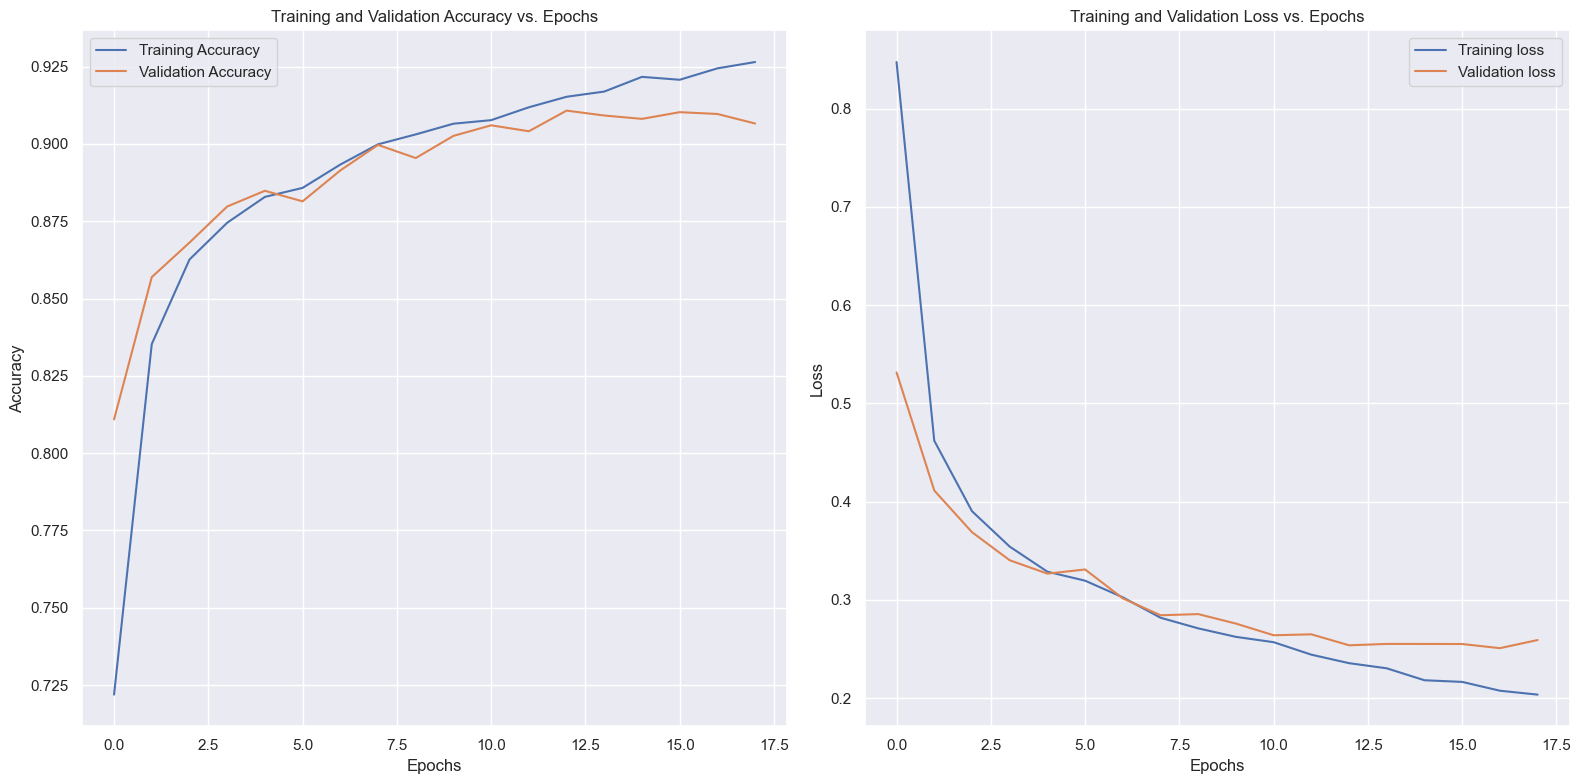

In [50]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

**Observation**: The margin between the training and testing accuracies and losses is much lower now. 

In [ ]:
train_loss2, train_accuracy2 = model2.evaluate(X_train, y_train, verbose=0)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test, verbose=0)

In [74]:
print("CASE 2: EARLY STOPPING")
print(f"Training Loss: {train_loss2:.3f}, Training Accuracy: {train_accuracy2:.3f}")
print(f"Test Loss: {test_loss2:.3f}, Test Accuracy: {test_accuracy2:.3f}")

CASE 2: EARLY STOPPING
Training Loss: 0.227, Training Accuracy: 0.920
Test Loss: 0.277, Test Accuracy: 0.899


Let us see if we can increase the generalization capabilities of our model further.

# CASE 3: Data Augmentation + Early Stopping

Data augmentation is a technique to **artificially increase the diversity of the training dataset**, which generally helps reduce overfitting and improves the model's ability to generalize to unseen data.

In [52]:
model3 = create_model()

In [53]:
model3.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

Here, we will use **ImageDataGenerator** in Keras. It generates extra augmented image data for training, in addition to original data. It takes advantage of the fact that, various image transformations like rotation, shifting, zooming, shearing, flipping, etc. don't change the label of the image. Using this additional data reduces overfitting, enhances dataset diversity, and supports efficient training. 

In [54]:
data_augmentor = ImageDataGenerator(
    rotation_range=10,  # Degrees of random rotation
    width_shift_range=0.1,  # Horizontal shift as a fraction of total width
    height_shift_range=0.1,  # Vertical shift as a fraction of total height
    zoom_range=0.1,  # Random zooming
    shear_range=0.1,  # Shearing
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest',
    validation_split=0.2)

In [55]:
train_generator = data_augmentor.flow(X_train, y_train, subset='training', batch_size=1024)
val_generator = data_augmentor.flow(X_train, y_train, subset='validation',batch_size=1024)

In [56]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               min_delta=0.01, 
                                               patience=5, 
                                               restore_best_weights=True)

In [57]:
history3 = model3.fit(train_generator,
                      epochs=100,
                      callbacks=[early_stopping],
                      validation_data=val_generator,
                      verbose=1)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 323ms/step - accuracy: 0.4988 - loss: 1.4509 - val_accuracy: 0.7161 - val_loss: 0.7592
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - accuracy: 0.7326 - loss: 0.7206 - val_accuracy: 0.7560 - val_loss: 0.6616
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 307ms/step - accuracy: 0.7689 - loss: 0.6245 - val_accuracy: 0.7868 - val_loss: 0.5875
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.7933 - loss: 0.5604 - val_accuracy: 0.8048 - val_loss: 0.5416
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - accuracy: 0.8071 - loss: 0.5252 - val_accuracy: 0.8159 - val_loss: 0.5154
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 310ms/step - accuracy: 0.8059 - loss: 0.5202 - val_accuracy: 0.8138 - val_loss: 0.5125
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 311ms/step - accuracy: 0.8139 - loss: 0.4928 - val_accuracy: 0.8288 - val_loss: 0.4767
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step - accuracy: 0.8252 - loss: 0.4692 - 

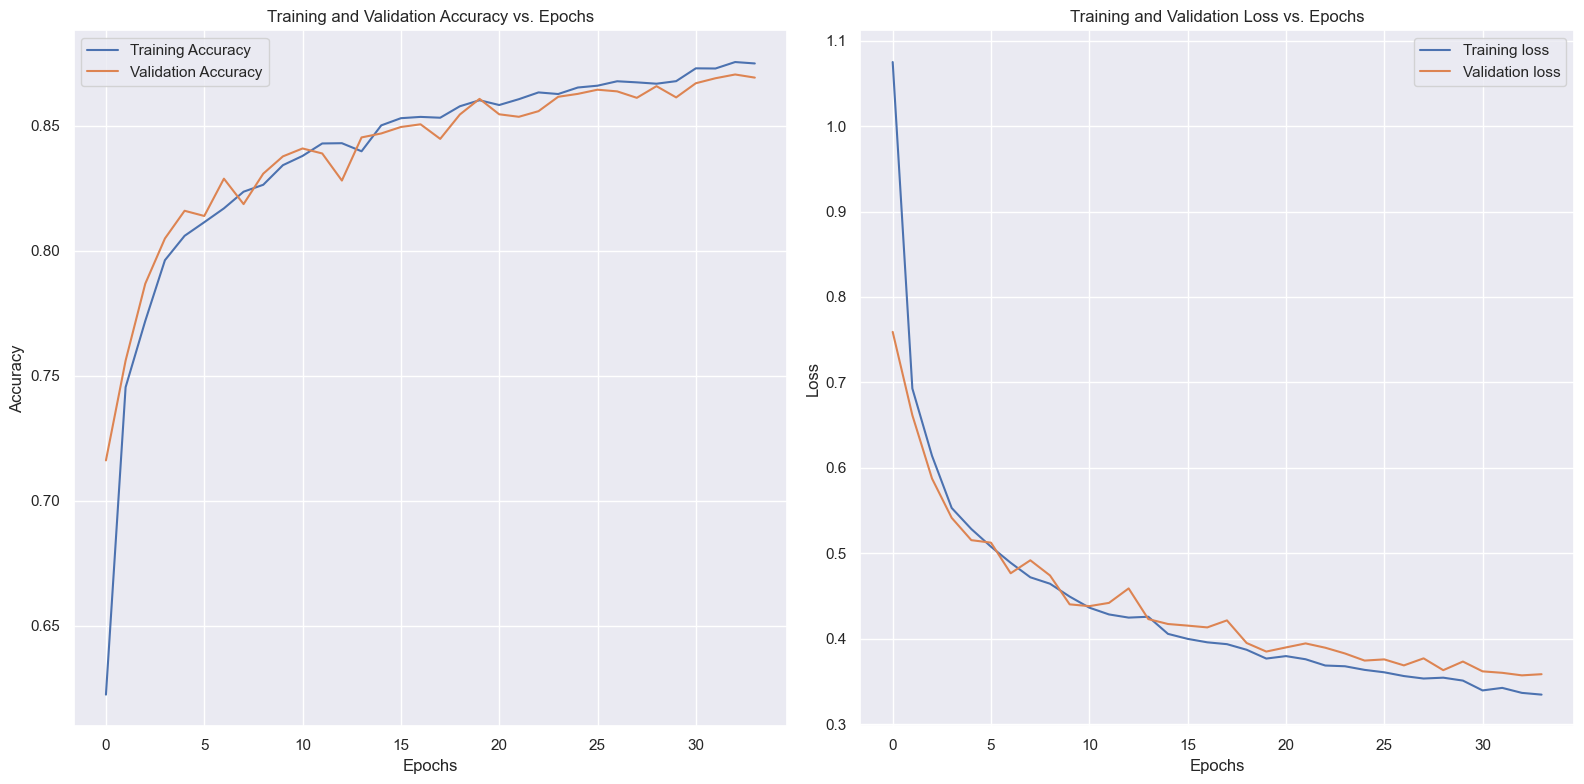

In [58]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
train_loss3, train_accuracy3 = model3.evaluate(X_train, y_train, verbose=0)
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test, verbose=0)

We can see that the training and validation accuracies as well as losses are even closer. Despite low value of accuracy, the model is able to generalize well on unseen data as well as artificial (corrupted) variants of original data.

In [73]:
print("CASE 3: DATA AUGMENTATION + EARLY STOPPING")
print(f"Training Loss: {train_loss3:.3f}, Training Accuracy: {train_accuracy3:.3f}")
print(f"Test Loss: {test_loss3:.3f}, Test Accuracy: {test_accuracy3:.3f}")

CASE 3: DATA AUGMENTATION + EARLY STOPPING
Training Loss: 0.294, Training Accuracy: 0.894
Test Loss: 0.326, Test Accuracy: 0.885


In [77]:
print("Difference between training and test accuracies:")
print("CASE 1: Vanilla CNN                          -> ",round(train_accuracy1-test_accuracy1,3))
print("CASE 2: Early Stopping                       -> ",round(train_accuracy2-test_accuracy2,3))
print("CASE 3: Data Augmentation and Early Stopping -> ",round(train_accuracy3-test_accuracy3,3))

Difference between training and test accuracies:
CASE 1: Vanilla CNN                          ->  0.066
CASE 2: Early Stopping                       ->  0.022
CASE 3: Data Augmentation and Early Stopping ->  0.009


In [78]:
print("Difference between training and test losses:")
print("CASE 1: Vanilla CNN                          -> ",round(test_loss1-train_loss1,3))
print("CASE 2: Early Stopping                       -> ",round(test_loss2-train_loss2,3))
print("CASE 3: Data Augmentation and Early Stopping -> ",round(test_loss3-train_loss3,3))

Difference between training and test losses:
CASE 1: Vanilla CNN                          ->  0.363
CASE 2: Early Stopping                       ->  0.05
CASE 3: Data Augmentation and Early Stopping ->  0.032


**Further scope**: To increase accuracy of the model further, more Convolution and maxPool layers can be added. 